In [41]:
%pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import json
import datetime
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_json('se-mi-reddit-comments-short.json', lines=True)

## Question 1

What time of day has the most activity?

In [3]:
def convert_to_datetime(t): 
    return datetime.datetime.utcfromtimestamp(t)
    
df['datetime'] = df.created_utc.apply(datetime.datetime.utcfromtimestamp)
df['timeofday'] = df.datetime.apply(lambda x: x.hour)
df

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,removal_reason,send_replies,steward_reports,subreddit_name_prefixed,total_awards_received,awarders,associated_award,collapsed_because_crowd_control,datetime,timeofday
0,Augustushomme,None,None,What do you think is so great about Oslo?,True,1,1514765161,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:06:01,0
1,eyeliketurtles,None,None,Used to live in Valley Ranch and absolutely lo...,True,0,1514765495,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:11:35,0
2,Komm,,royal oak,We have a penguin mingle?!,True,0,1514765632,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:13:52,0
3,veryniiiice,,Gaines Township,Looks just like the ones they use at devos hall.,True,0,1514765771,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:16:11,0
4,CodeGR,,West Grand,Can't believe people are getting out of their ...,True,0,1514766047,None,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:20:47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86745,dustyboy313,None,Southwest,I agree with you. His detroit episode was garbage,True,1,1566602275,None,0,0,...,NaN,1.0,[],r/Detroit,0.0,[],NaN,NaN,2019-08-23 23:17:55,23
86746,jch2617,None,None,If all else fails Jesus is Lord..,True,0,1566602364,None,0,0,...,NaN,1.0,[],r/grandrapids,0.0,[],NaN,NaN,2019-08-23 23:19:24,23
86747,altakvetcher,None,None,We (couple- w/no kids or pets at the time) exp...,True,0,1566602392,None,0,0,...,NaN,1.0,[],r/AnnArbor,0.0,[],NaN,NaN,2019-08-23 23:19:52,23
86748,Stratiform,None,Berkley,I once got stuck in traffic at 11 pm on the 40...,True,0,1566602477,None,0,0,...,NaN,1.0,[],r/Detroit,0.0,[],NaN,NaN,2019-08-23 23:21:17,23


In [4]:
df.groupby('timeofday').author.count().sort_values(ascending=False)

timeofday
16    6032
17    6008
15    5801
18    5619
14    5375
19    5360
13    5075
20    5037
1     4703
21    4546
2     4495
0     4386
22    4346
23    4127
12    3501
3     3367
4     2275
11    1989
5     1383
10     991
6      884
7      525
9      506
8      419
Name: author, dtype: int64

4PM seems to have the most amount of activity. 

## Question 2

Are comments more positive or negative?

In [5]:
sa = SentimentIntensityAnalyzer()

In [6]:
def getSentiment(text):
    return 'positive' if sa.polarity_scores(text)['compound'] > 0 else 'negative'

df['sentiment'] = df.body.apply(getSentiment)

In [7]:
df.groupby('sentiment').author.count().sort_values(ascending=False)

sentiment
positive    44203
negative    42547
Name: author, dtype: int64

Comments on reddit tend to be more positive. 

## Question 3

What are the most common words on Reddit and graph the 30 most common words.

In [8]:
tokenizer = RegexpTokenizer('\w+')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
def create_tokens(text):
    tokens = tokenizer.tokenize(text.lower())
    arr = []
    for word in tokens: 
        if word not in stop:
            arr.append(word)
    return arr
    
df['tokens'] = df.body.apply(create_tokens)

In [10]:
word_counts = Counter() 
def get_counts(tokens):
    for word in tokens:
        word_counts[word] += 1
        
df.tokens.apply(get_counts)

0        None
1        None
2        None
3        None
4        None
         ... 
86745    None
86746    None
86747    None
86748    None
86749    None
Name: tokens, Length: 86750, dtype: object

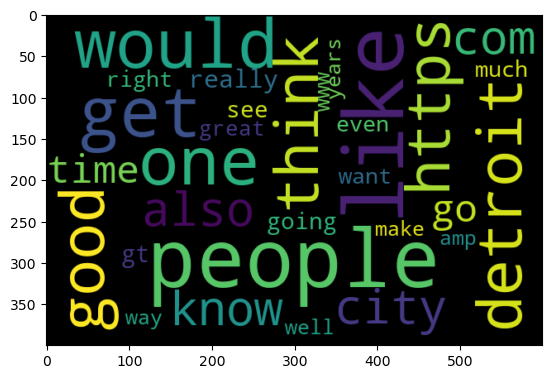

In [13]:
top_30 = {}
for word, count in word_counts.most_common(30):
    top_30[word] = count

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100)
wordcloud.generate_from_frequencies(top_30)
plt.imshow(wordcloud, interpolation='bilinear')

In [14]:
top_30

{'like': 12786,
 'people': 12333,
 'get': 8670,
 'would': 8547,
 'one': 8358,
 'good': 6974,
 'detroit': 6898,
 'https': 6437,
 'think': 6393,
 'city': 5831,
 'also': 5794,
 'know': 5730,
 'com': 5591,
 'time': 5586,
 'go': 5526,
 'really': 5243,
 'gt': 4906,
 'going': 4674,
 'see': 4542,
 'right': 4326,
 'want': 4298,
 'even': 4286,
 'much': 4268,
 'great': 4108,
 'www': 4078,
 'make': 3897,
 'well': 3860,
 'way': 3831,
 'amp': 3827,
 'years': 3825}

The 5 most common words are: like, people, get, would and one.

## Question 4

Did the number of comments increase per year?

In [16]:
df['year'] = df.datetime.apply(lambda x: x.year)

In [17]:
df.groupby('year').author.count()

year
2018    13207
2019    73543
Name: author, dtype: int64

## Question 5

What is the most common word for each year?

datetime.datetime(2012, 8, 7, 5, 29, 16)